# Data wrangling

## 3. Now it's your turn

Now you will analyze data from Matthews et al. (2016): Why do we overestimate others' willingness to pay? The purpose of this research was to test if our beliefs about other people's affluence (i.e.; wealth) affect how much we think they will be willing to pay for items. You can find the full paper at http://journal.sjdm.org/15/15909/jdm15909.pdf.

**Variables description:**

Here are descriptions of the data variables (taken from the author's dataset notes available at http://journal.sjdm.org/15/15909/Notes.txt)

- `id`: participant id code
- `gender`: participant gender. 1 = male, 2 = female
- `age`: participant age
- `income`: participant annual household income on categorical scale with 8 categorical options: Less than 5,000; 15,001–25,000; 25,001–35,000; 35,001–50,000; 50,001–75,000; 75,001–100,000; 100,001–150,000; greater than 150,000.
- `p1-p10`: whether the "typical" survey respondent would pay more (coded 1) or less (coded 0) than oneself, for each of the 10 products 
- `task`: whether the participant had to judge the proportion of other people who "have more money than you do" (coded 1) or the proportion who "have less money than you do" (coded 0)
- `havemore`: participant's response when task = 1
- `haveless`: participant's response when task = 0
- `pcmore`: participant's estimate of the proportion of people who have more than they do (calculated as 100-haveless when task=0)

In [1]:
library(tidyverse)
library(haven)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


**Note**: There is no need to import packages that are already included in tidyverse when you import tidyverse.

For example:
```
library(tidyverse)
library(dplyr) #not necessary
library(ggplot2) #not necessary
library(haven) #necessary
```

I advise you to not import what is not necessary to avoid conflicts.

In [2]:
# load some data
matthews_data = read_csv('https://raw.githubusercontent.com/laurafontanesi/RcourseSpring2019/master/data/data_wpa4.csv')

demographics = read_csv("https://raw.githubusercontent.com/laurafontanesi/RcourseSpring2019/master/data/matthews_demographics.csv")

glimpse(matthews_data)

glimpse(demographics)

Parsed with column specification:
cols(
  id = col_character(),
  gender = col_double(),
  age = col_double(),
  income = col_double(),
  p1 = col_double(),
  p2 = col_double(),
  p3 = col_double(),
  p4 = col_double(),
  p5 = col_double(),
  p6 = col_double(),
  p7 = col_double(),
  p8 = col_double(),
  p9 = col_double(),
  p10 = col_double(),
  task = col_double(),
  havemore = col_double(),
  haveless = col_double(),
  pcmore = col_double()
)
Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  id = col_character(),
  height = col_double(),
  race = col_character()
)


Observations: 190
Variables: 18
$ id       <chr> "R_3PtNn51LmSFdLNM", "R_2AXrrg62pgFgtMV", "R_cwEOX3HgnMeVQHL…
$ gender   <dbl> 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, …
$ age      <dbl> 26, 32, 25, 33, 24, 22, 47, 26, 29, 32, 29, 28, 31, 24, 25, …
$ income   <dbl> 7, 4, 2, 5, 1, 2, 3, 4, 1, 7, 4, 3, 2, 2, 6, 3, 2, 2, 1, 3, …
$ p1       <dbl> 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, …
$ p2       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, …
$ p3       <dbl> 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, …
$ p4       <dbl> 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ p5       <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, …
$ p6       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, …
$ p7       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, …
$ p8       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ p9       <dbl> 1, 

**Task A**

Note: do not use pipes from 1 to 4.

1. Currently `gender` is coded as 1 and 2. Create a new dataframe called `new_matthews_data`, in which there is a new column called `gender_labels` that codes gender as "male" and "female". Do it using `mutate`. Then, rename the original `gender` column to `gender_binary` using `rename`. Subtract 1 to all values of `gender_binary`, so that it is coded as 0 and 1 instead of 1 and 2 using `mutate` again.

2. In `new_matthews_data`, create new column called `income_labels` that codes income based on the data description above using `mutate`. Then, create a new column, called `income_recoded`, where you only have 4 income categories (coded as numbers from 1 to 4): below 25,000, 25,000-50,000, 50,000-100,000, and above 100,000 using `case_when`. How many observations are there for each of these 4 categories? Use `summarise` to reply.

3. In `new_matthews_data`, transform all numeric columns into integers numbers using `mutate_if`.

4. From `new_matthews_data`, create a summary of the dataset using `summarise`, to answer the following questions: What percent of participants were female? What was the minimum, mean, and maximum `income`? What was the 25th percentile, median, and the 75th percentile of `age`? Use good names for columns.

5. Repeat steps from 1 to 4 (apart from the `summarise` in point 2) using pipes and assign the result to `new_matthews_data_summary`.

In [3]:
new_matthews_data = mutate(matthews_data,
                           gender_labels = recode(gender,
                                                  `1`="male",
                                                  `2`="female"))
new_matthews_data = rename(new_matthews_data,
                           gender_binary = gender)

new_matthews_data = mutate(new_matthews_data,
                           gender_binary = gender_binary - 1)
head(new_matthews_data)

id,gender_binary,age,income,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,task,havemore,haveless,pcmore,gender_labels
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
R_3PtNn51LmSFdLNM,1,26,7,1,1,1,1,1,1,1,1,1,1,0,NA,50,50,female
R_2AXrrg62pgFgtMV,1,32,4,1,1,1,1,1,1,1,1,1,1,0,NA,25,75,female
R_cwEOX3HgnMeVQHL,0,25,2,0,1,1,1,1,1,1,1,0,0,0,NA,10,90,male
R_d59iPwL4W6BH8qx,0,33,5,1,1,1,1,1,1,1,1,1,1,0,NA,50,50,male
R_1f3K2HrGzFGNelZ,0,24,1,1,1,0,1,1,1,1,1,1,1,1,99,NA,99,male
R_3oN5ijzTfoMy4ca,0,22,2,1,1,0,0,1,1,1,1,0,1,0,NA,20,80,male


Review example of code:

```
new_matthews_data = matthews_data %>%
  mutate(gender_labels = gender,
         gender_labels = recode(gender,
                                `1` = "male",
                                `2` = "female"))
View(new_matthews_data_pipe)

new_matthews_data2 = matthews_data %>%
  rename(gender_binary = gender)

new_matthews_data3 = new_matthews_data2 %>%
  gender_binary = recode(gender_binary,
                         `2` = 1,
                         `1` = 0)
```

- in this part of the assignment you shouldn't have used pipes (anything with operator `%>%`)
- `gender_labels = gender` in line 2 is not necessary, because with `recode`, when assinign to a new name, you already create a new column
- `View(new_matthews_data_pipe)` refers to a non-existing object. Keep your script clean.
- `new_matthews_data2 = matthews_data %>%` no need to assign to a new name. don't do it too much, unless it's specifically asked. Also, you should have then used `new_matthews_data` to rewrite on, and not `matthews_data`, because in this way you do not have `gender_labels` that you created above.
- recoding 0-1 to 1-2 is also ok in this case.

In [4]:
new_matthews_data = mutate(new_matthews_data,
                           income_lables = recode(income,
                                                  `1`='less5,000',
                                                  `2`='15,001–25,000',
                                                  `3`='25,001–35,000',
                                                  `4`='35,001–50,000',
                                                  `5`='50,001–75,000',
                                                  `6`='75,001–100,000',
                                                  `7`='100,001–150,000',
                                                  `8`='greater150,000'
                                                 ),
                           income_recoded = case_when(income < 3 ~ 1,
                                                      income >=3 & income < 5 ~ 2,
                                                      income >= 5 & income < 7 ~ 3,
                                                      income >=7 ~ 4))

head(new_matthews_data)

summarise(group_by(new_matthews_data, income_recoded), 
          n = n())

id,gender_binary,age,income,p1,p2,p3,p4,p5,p6,⋯,p8,p9,p10,task,havemore,haveless,pcmore,gender_labels,income_lables,income_recoded
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
R_3PtNn51LmSFdLNM,1,26,7,1,1,1,1,1,1,⋯,1,1,1,0,NA,50,50,female,"100,001–150,000",4
R_2AXrrg62pgFgtMV,1,32,4,1,1,1,1,1,1,⋯,1,1,1,0,NA,25,75,female,"35,001–50,000",2
R_cwEOX3HgnMeVQHL,0,25,2,0,1,1,1,1,1,⋯,1,0,0,0,NA,10,90,male,"15,001–25,000",1
R_d59iPwL4W6BH8qx,0,33,5,1,1,1,1,1,1,⋯,1,1,1,0,NA,50,50,male,"50,001–75,000",3
R_1f3K2HrGzFGNelZ,0,24,1,1,1,0,1,1,1,⋯,1,1,1,1,99,NA,99,male,"less5,000",1
R_3oN5ijzTfoMy4ca,0,22,2,1,1,0,0,1,1,⋯,1,0,1,0,NA,20,80,male,"15,001–25,000",1


income_recoded,n
<dbl>,<int>
1,72
2,56
3,52
4,10


Review example of code:

```
new_matthews_data = mutate(new_matthews_data,
                           income_recoded = case_when(income == 1 | == 2 ~ "below 25000",
                                                      income == 3 | == 4 ~ "25000 - 50000",
                                                      income == 5 | == 6 ~ "50000 - 100000",
                                                      income == 7 | == 8 ~ "above 100000"))
```

When using logical operators as `&` or `|` you have to write "full sentences" (variable == variable, not just == variable). Also, you were supposed to recode it to numbers, not the character labels. The correct version of the code below is:

```
new_matthews_data = mutate(new_matthews_data,
                           income_recoded = case_when(income == 1 | income == 2 ~ 1,
                                                      income == 3 | income == 4 ~ 2,
                                                      income == 5 | income == 6 ~ 3,
                                                      income == 7 | income == 8 ~ 4))
```

In [5]:
new_matthews_data = mutate_if(new_matthews_data,
                              is.numeric, 
                              as.integer)
head(new_matthews_data)

id,gender_binary,age,income,p1,p2,p3,p4,p5,p6,⋯,p8,p9,p10,task,havemore,haveless,pcmore,gender_labels,income_lables,income_recoded
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>
R_3PtNn51LmSFdLNM,1,26,7,1,1,1,1,1,1,⋯,1,1,1,0,NA,50,50,female,"100,001–150,000",4
R_2AXrrg62pgFgtMV,1,32,4,1,1,1,1,1,1,⋯,1,1,1,0,NA,25,75,female,"35,001–50,000",2
R_cwEOX3HgnMeVQHL,0,25,2,0,1,1,1,1,1,⋯,1,0,0,0,NA,10,90,male,"15,001–25,000",1
R_d59iPwL4W6BH8qx,0,33,5,1,1,1,1,1,1,⋯,1,1,1,0,NA,50,50,male,"50,001–75,000",3
R_1f3K2HrGzFGNelZ,0,24,1,1,1,0,1,1,1,⋯,1,1,1,1,99,NA,99,male,"less5,000",1
R_3oN5ijzTfoMy4ca,0,22,2,1,1,0,0,1,1,⋯,1,0,1,0,NA,20,80,male,"15,001–25,000",1


Review example code:

```
new_matthews_data = new_matthews_data %>%
    mutate_if(is.numeric(as.integer)
```

- wrong brackets: `is.numeric` and `as.integer` are both arguments of the function `mutate_if`
- also, no pipes should have been used here

In [6]:
summarise(new_matthews_data,
          perc_female = mean(gender_binary)*100,
          min_income = min(income),
          mean_income = mean(income),
          max_income = max(income),
          perc25_age = quantile(age, .25),
          median_age = quantile(age, .5),
          perc75_age = quantile(age, .75)
          )

perc_female,min_income,mean_income,max_income,perc25_age,median_age,perc75_age
<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
37.36842,1,3.531579,8,25,30,35


Review example code:

```
>new_mattews_summary = new_matthews_data %>%
summarize(
  min_income = min(income, na.rm = TRUE),
  median_income = quantile(income, 0.5, na.rm = TUE),
  max_income = max(income, na.rm = TRUE),
  age_percentile = quantile(age, 0.25, 0.5, 0.75, na.rm = TRUE))
  
output when fixing typo:
# A tibble: 1 x 4
  min_income median_income max_income age_percentile
       <int>         <dbl>      <int>          <int>
1          1             3          8             25
```


- typo? at line 4: 'TUE' instead of TRUE
- perc_female is missing. You can calculate it from gender binary, as 1 is female and 0 is male. The mean of that gives you exactly the percentage (on a scale from 0 to 1, so then you can simply multiply by 100).
- you have to split quantiles in separate columns, otherwise only the first is shown

In [7]:
new_matthews_data_summary = matthews_data %>% 
    mutate(gender_labels = recode(gender,
                                 `1`="male",
                                 `2`="female"))  %>% 
    rename(gender_binary = gender)  %>% 
    mutate(gender_binary = gender_binary - 1) %>%
    mutate(income_lables = recode(income,
                                  `1`='less5,000',
                                  `2`='15,001–25,000',
                                  `3`='25,001–35,000',
                                  `4`='35,001–50,000',
                                  `5`='50,001–75,000',
                                  `6`='75,001–100,000',
                                  `7`='100,001–150,000',
                                  `8`='greater150,000'),
           income_recoded = case_when(income < 3 ~ 1,
                                      income >=3 & income < 5 ~ 2,
                                      income >= 5 & income < 7 ~ 3,
                                      income >=7 ~ 4)) %>%
    mutate_if(is.numeric, 
              as.integer) %>%
    summarise(perc_female = mean(gender_binary)*100,
              min_income = min(income),
              mean_income = mean(income),
              max_income = max(income),
              perc25_age = quantile(age, .25),
              median_age = quantile(age, .5),
              perc75_age = quantile(age, .75))

new_matthews_data_summary

perc_female,min_income,mean_income,max_income,perc25_age,median_age,perc75_age
<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.3736842,1,3.531579,8,25,30,35


**Task B**

1. From `new_matthews_data`, calculate the mean `p1` to `p10` across participants using `summarise_all` and `select`. Which product scored the highest? Do it again, grouping the data by gender. Is there a difference across gender? What is the mean of the mean `p1` to `p10` across participants? Calculate it on the result of the previous step. You can do these either using pipes or not.

2. Transform the data from wide to long format. In particular, you want 10 rows per subjects, with their responses on the products 1 to 10 in a column called `wtp`, and the product label in a column called `product`. Call the resulting dataframe `new_matthews_data_long`. Re-order it by `id`. Print the first 20 cases to check this worked. Check that `new_matthews_data_long` has 10 times more rows than `new_matthews_data`.

In [32]:
# with pipes
new_matthews_data %>%
    group_by(gender_binary) %>%
    select(p1:p10) %>%
    summarise_all(mean)

# without pipes
selected_data = select(new_matthews_data, p1:p10, gender_binary)
grouped_data = group_by(selected_data, gender_binary)
summarise_all(grouped_data, mean)

write_csv(summarise_all(grouped_data, mean), "~/Desktop/grouped_data.csv")

Adding missing grouping variables: `gender_binary`


gender_binary,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.7226891,0.8487395,0.6302521,0.8571429,0.7899160,0.7815126,0.8655462,0.8739496,0.6890756,0.7058824
1,0.6478873,0.8873239,0.8309859,0.8450704,0.7464789,0.8309859,0.8591549,0.9436620,0.6478873,0.7746479


gender_binary,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.7226891,0.8487395,0.6302521,0.8571429,0.7899160,0.7815126,0.8655462,0.8739496,0.6890756,0.7058824
1,0.6478873,0.8873239,0.8309859,0.8450704,0.7464789,0.8309859,0.8591549,0.9436620,0.6478873,0.7746479


Review example:

```
summarise(new_matthews_data, 
              mean_p1=mean(p1),
          mean_p2=mean(p2),
          mean_p3=mean(p3),
          mean_p4=mean(p4),
          mean_p5=mean(p5),
          mean_p6=mean(p6),
          mean_p7=mean(p7),
          mean_p8=mean(p8),
          mean_p9=mean(p9),
          mean_p10=mean(p10)
          )

grouped_gender_new_matthews_data=group_by(new_matthews_data,gender_binary)

summarise(grouped_gender_new_matthews_data, 
          mean_p1=mean(p1),
          mean_p2=mean(p2),
          mean_p3=mean(p3),
          mean_p4=mean(p4),
          mean_p5=mean(p5),
          mean_p6=mean(p6),
          mean_p7=mean(p7),
          mean_p8=mean(p8),
          mean_p9=mean(p9),
          mean_p10=mean(p10)
)
```
Good, but you can use select and summarize_all to make it more concise.

In [15]:
new_matthews_data_long = gather(new_matthews_data,
                                key='product',
                                value='wtp',
                                p1:p10)

new_matthews_data_long = arrange(new_matthews_data_long, id)

nrow(new_matthews_data_long)
nrow(new_matthews_data)

head(new_matthews_data_long, 20)

[1] 1900

[1] 190

id,gender_binary,age,income,task,havemore,haveless,pcmore,gender_labels,income_lables,income_recoded,product,wtp
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p1,1
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p2,1
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p3,1
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p4,1
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p5,1
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p6,0
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p7,1
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p8,1
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p9,1


**Task C**

1. Drop the `X1` column in `demographics` using `select`.

2. Join `new_matthews_data_long` and `demographics` based on the `id`, in order to retain as many rows and columns as possible. Call the resulting dataframe `matthews_data_all`.

3. Calculate the mean `wtp` per subject using `group_by`. You can use pipes or not. Called the resulting dataframe `mean_matthews_data_all`. This should have as many rows as the number of subjects and 2 columns (`id` and mean wtp). Add as a third and fourth columns `heigth` and `race` using one of the join functions.

4. Using `mean_matthews_data_all`, make a barplot showing the mean `wtp` across ethnic groups. Plot confidence intervals. Give appropriate labels to the plot. Do you think there is a difference in willingness to pay across groups?

5. Using `mean_matthews_data_all`, make a scatterplot showing the wtp on the y-axis and the height on the x-axis. Add a regression line. Do you think height predicts willingness to pay?

In [17]:
demographics = select(demographics, -c(X1))

head(demographics)

id,height,race
<chr>,<dbl>,<chr>
R_2zOA03wY3kZPHKj,182,black
R_1f30AbYQR0D1wpt,184,white
R_2YgEERKijE2Hz6K,175,hispanic
R_1CdL2n22srUR26d,177,white
R_1HnsqBRimnKphfg,187,white
R_12PUXbJhfNF9GAE,178,white


In [18]:
matthews_data_all = full_join(new_matthews_data_long, demographics, by="id")

head(matthews_data_all)

id,gender_binary,age,income,task,havemore,haveless,pcmore,gender_labels,income_lables,income_recoded,product,wtp,height,race
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p1,1,176,black
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p2,1,176,black
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p3,1,176,black
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p4,1,176,black
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p5,1,176,black
R_0JLtfRpOyh8pOCN,1,45,4,1,80,NA,80,female,"35,001–50,000",2,p6,0,176,black


In [23]:
mean_matthews_data_all = matthews_data_all %>%
    group_by(id) %>%
    summarise(mean_wtp=mean(wtp))

mean_matthews_data_all = full_join(mean_matthews_data_all, demographics, by="id")

head(mean_matthews_data_all)

id,mean_wtp,height,race
<chr>,<dbl>,<dbl>,<chr>
R_0JLtfRpOyh8pOCN,0.9,176,black
R_0O52mja29pBTphb,0.6,171,asian
R_0OnZ5ZwmVAU6w2V,0.8,150,hispanic
R_0oXJeSTrYNzQlRH,0.8,180,asian
R_10CVQqqmFiczGPS,0.7,173,asian
R_10HKEOMi0HhWe7T,0.7,177,asian


In [22]:
# Ignore this (only for notebooks):
library(repr)
options(repr.plot.width=12, repr.plot.height=6)

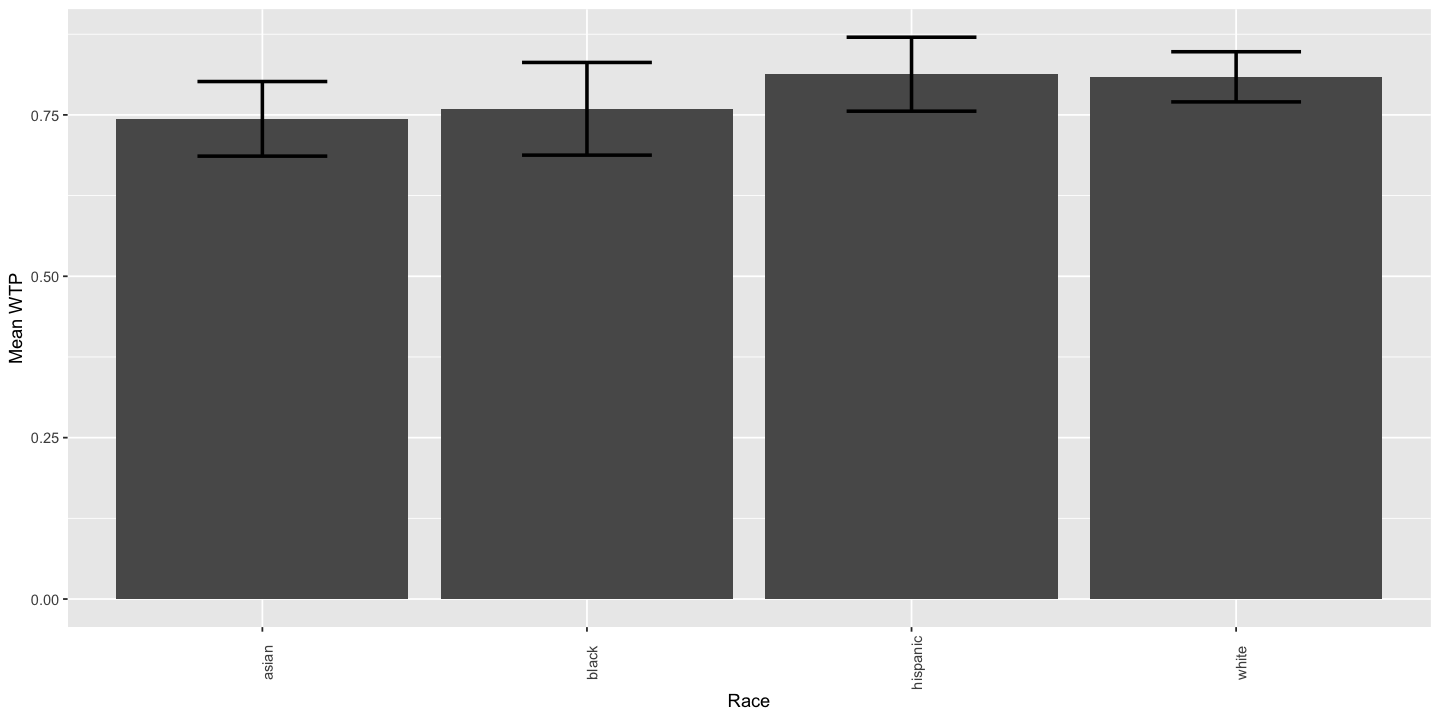

In [31]:
ggplot(data = mean_matthews_data_all, mapping = aes(x = factor(race), y = mean_wtp)) +
    stat_summary(fun.y = "mean", geom="bar") +
    stat_summary(fun.data = mean_cl_normal, geom = "errorbar", size=1, width=.4) +
    labs(x = 'Race', y = 'Mean WTP') + 
    theme(axis.text.x = element_text(angle = 90))

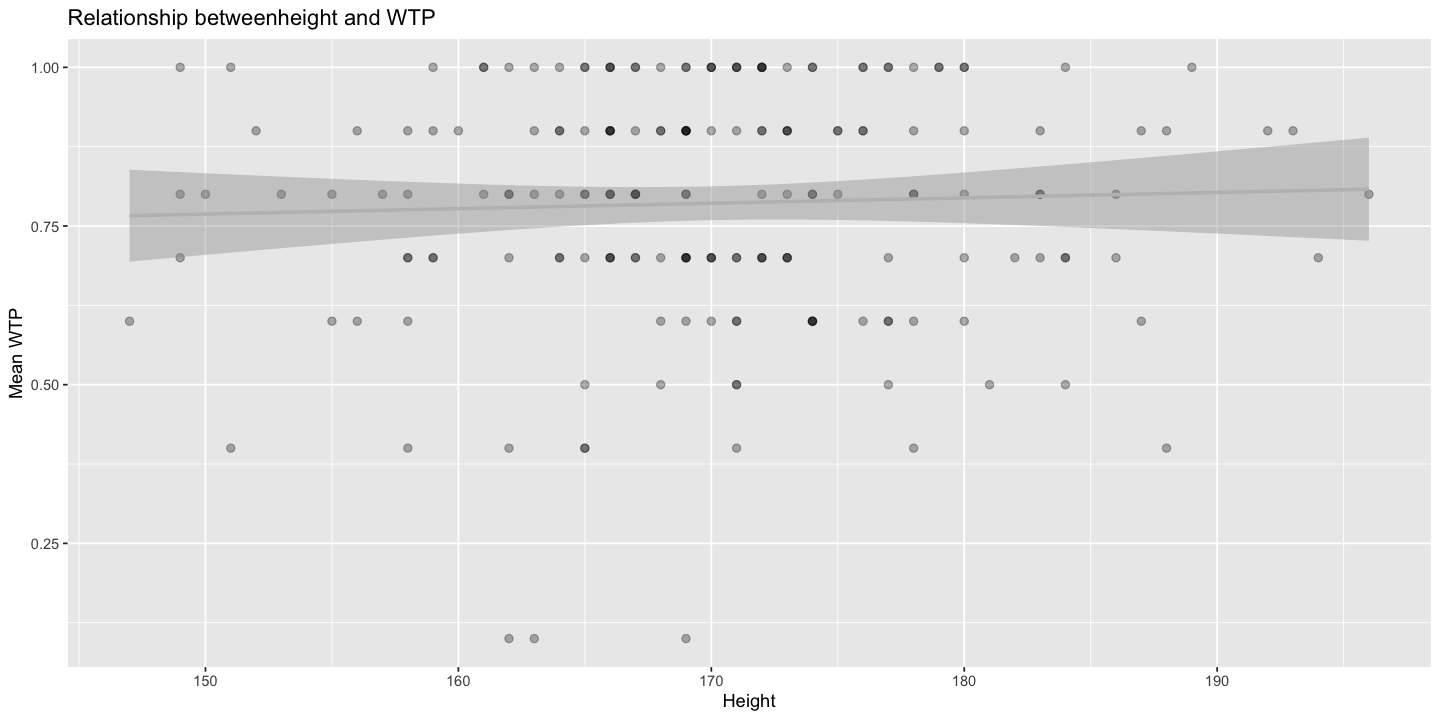

In [29]:
ggplot(data = mean_matthews_data_all, mapping = aes(x = height, y = mean_wtp)) + 
    geom_point(alpha = 0.3, size= 2) +
    geom_smooth(method = lm, color='grey') +
    labs(x='Height', y='Mean WTP') +
    ggtitle("Relationship betweenheight and WTP")

## Submit your assignment

Save and email your script to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch) by the end of **Friday, 20th March**.